In [1]:
import pandas as pd  # data preprocessing
import numpy as np  # Mathematical calculation
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns   # data visualization

import warnings
warnings.filterwarnings("ignore")

<h2> Load file </h2>

In [2]:
df=pd.read_csv("salary1.csv")
df.head(2)

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1032 non-null   int64 
 1   age             1032 non-null   int64 
 2   Workclass       1032 non-null   object
 3   fnlwgt          1032 non-null   int64 
 4   education       1032 non-null   object
 5   education-num   1032 non-null   int64 
 6   marital-status  1032 non-null   object
 7   occupation      1032 non-null   object
 8   relationship    1032 non-null   object
 9   race            1032 non-null   object
 10  sex             1032 non-null   object
 11  capital-gain    1032 non-null   int64 
 12  capital-loss    1032 non-null   int64 
 13  hours-per-week  1032 non-null   int64 
 14  native-country  1032 non-null   object
 15  Income          1032 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 129.1+ KB


<h2> Null Value </h2>

In [4]:
df.isnull().sum()

Unnamed: 0        0
age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [5]:
df.shape

(1032, 16)

In [6]:
df.isin(['?']).sum()

Unnamed: 0        0
age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

# <h3> Drop column </h3>

In [7]:
df.drop('Unnamed: 0', axis= 1, inplace=True)

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395,0.246124
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603,0.430961
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000,1.000000


<h2> Analysis </h2>

<AxesSubplot:xlabel='Income', ylabel='count'>

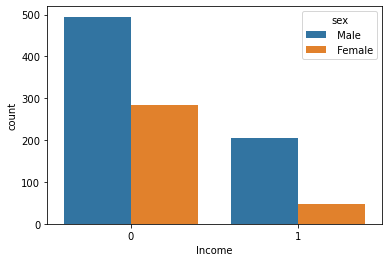

In [9]:
sns.countplot(x='Income', data=df, hue='sex')

In [10]:
df['Income'].value_counts()

0    778
1    254
Name: Income, dtype: int64

In [11]:
df.groupby(['sex','Income'])['Income'].count()

sex      Income
 Female  0         283
         1          48
 Male    0         495
         1         206
Name: Income, dtype: int64

In [12]:
print(f"0(<50k):{round(778/1032 *100,2)}")
print(f"1(>=50k):{round(254/1032 *100,2)}")

0(<50k):75.39
1(>=50k):24.61


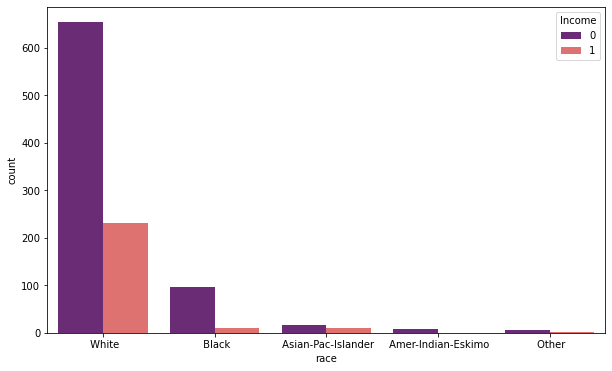

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df['race'],hue='Income', data=df, palette='magma')
plt.show()

# <h2> Correlation </h2>

<AxesSubplot:>

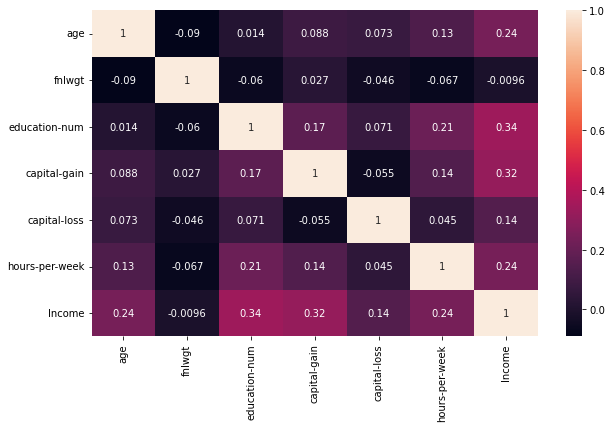

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [15]:
feature= df.iloc[:,:-1]
target= df.iloc[:,-1]

In [16]:
feature.head(2)

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States


In [17]:
target.head(2)

0    0
1    0
Name: Income, dtype: int64

<h2> Finding Numerical datatype </h2>

In [18]:
numerical= feature.select_dtypes(['int64']).columns

In [19]:
np.unique(numerical.values)

array(['age', 'capital-gain', 'capital-loss', 'education-num', 'fnlwgt',
       'hours-per-week'], dtype=object)

In [20]:
for i in numerical:
    print(f"{i}: {len(feature[i].unique())}")

age: 65
fnlwgt: 1014
education-num: 16
capital-gain: 33
capital-loss: 31
hours-per-week: 54


In [21]:
# this is Discrete data

df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [22]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

# <h2> Skewness </h2>

In [23]:
from scipy.stats import skew

age
0.6160534414050984


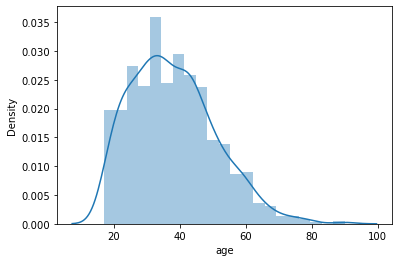

fnlwgt
1.3937557919747436


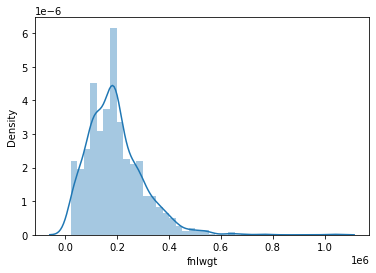

education-num
-0.30220179407263364


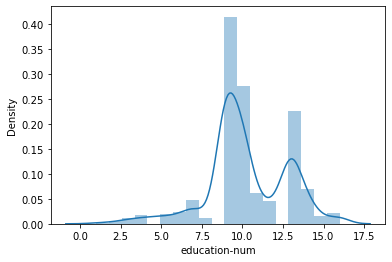

capital-gain
5.409818233508558


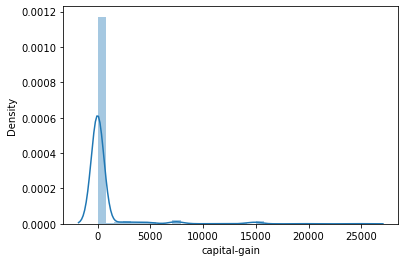

capital-loss
4.071696903313479


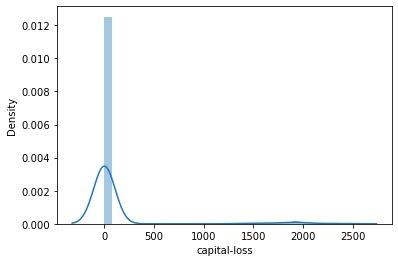

hours-per-week
0.16318627165535773


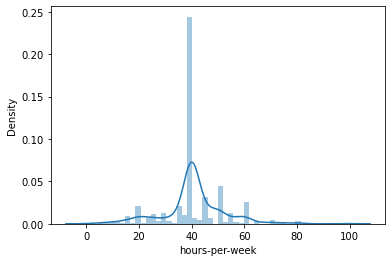

In [24]:
for col in  feature[numerical]:
    print(col)
    print(skew(feature[col]))
    
    plt.figure()
    sns.distplot(feature[col])
    plt.show()

In [25]:
np.log(0)

-inf

In [26]:
np.linspace(-1,1,20)

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [27]:
df['fnlwgt'].unique()

array([ 77516,  83311, 215646, ..., 227644, 205267, 288020], dtype=int64)

In [28]:
pd.concat([feature,target], axis=1).corr()['Income'].sort_values()

fnlwgt           -0.009615
capital-loss      0.144675
age               0.238756
hours-per-week    0.240963
capital-gain      0.317856
education-num     0.336148
Income            1.000000
Name: Income, dtype: float64

In [29]:
#feature['capital-gain'].unique()

In [30]:
#feature['capital-gain'].value_counts()

<h2> Remove Skewness </h2>

In [31]:

feature['fnlwgt']= np.log(feature['fnlwgt'])
skew(feature['fnlwgt'])

-0.7760135687863778

In [32]:

feature['age']= np.log(feature['age'])
skew(feature['age'])


-0.14911720846420032

In [33]:
# feature.drop(['capital-gain', 'capital-loss'], axis=1, inplace= True)  # do not drop

In [34]:
feature.head(2)

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,3.663562,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,3.912023,Self-emp-not-inc,11.330336,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States


In [35]:
num= feature.select_dtypes(['int64','float64']).columns
num


Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

age
-0.14911720846420032


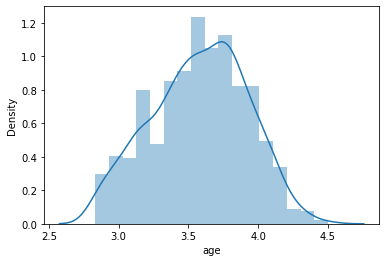

fnlwgt
-0.7760135687863778


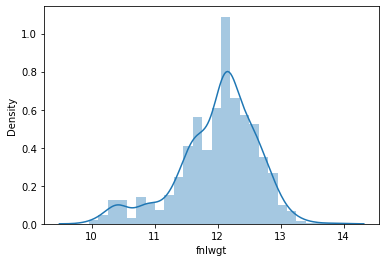

education-num
-0.30220179407263364


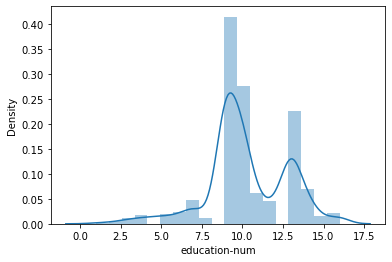

capital-gain
5.409818233508558


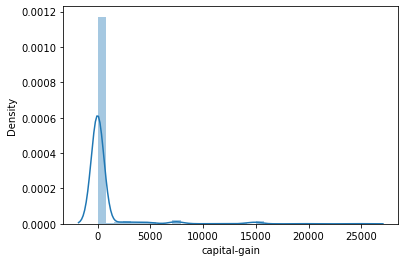

capital-loss
4.071696903313479


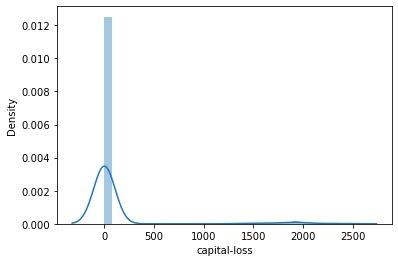

hours-per-week
0.16318627165535773


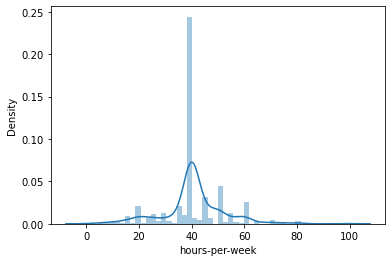

In [36]:

for col in  feature[num]:
    print(col)
    print(skew(feature[col]))
    
    plt.figure()
    sns.distplot(feature[col])
    plt.show()

    

So skewness has been remove except capital-gain & capital-loss column

<h2> Finding Object from dataset </h2>

In [37]:
obj=feature.select_dtypes(["object"]).columns
obj

Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [38]:
for i in obj:
    print(f"{i}: {len(feature[i].unique())}")

Workclass: 6
education: 16
marital-status: 7
occupation: 14
relationship: 6
race: 5
sex: 2
native-country: 30


In [39]:
for i in obj:
    print(feature[i].value_counts())
    print("\n \n")

 Private             766
 Self-emp-not-inc     90
 Local-gov            76
 State-gov            40
 Self-emp-inc         38
 Federal-gov          22
Name: Workclass, dtype: int64

 

 HS-grad         338
 Some-college    225
 Bachelors       184
 Masters          56
 Assoc-voc        50
 11th             39
 Assoc-acdm       37
 10th             19
 Doctorate        17
 9th              16
 7th-8th          14
 Prof-school      12
 5th-6th          10
 12th              9
 1st-4th           4
 Preschool         2
Name: education, dtype: int64

 

 Married-civ-spouse       472
 Never-married            345
 Divorced                 142
 Separated                 30
 Widowed                   28
 Married-spouse-absent     14
 Married-AF-spouse          1
Name: marital-status, dtype: int64

 

 Prof-specialty       143
 Craft-repair         136
 Exec-managerial      131
 Sales                126
 Other-service        119
 Adm-clerical         101
 Machine-op-inspct     70
 Transport-movi

# <h3> Category </h3>

In [40]:
# Education Category

feature['education'].replace(['1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','Preschool'],'School',inplace =True, regex= True)
feature['education'].replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'Higher',inplace =True, regex= True)



In [41]:
# marital Status

feature['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married', inplace=True, regex= True)
feature['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Other', inplace=True, regex= True)

In [42]:
feature['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia'],
      dtype=object)

In [43]:
#Country category
feature['native-country'].replace([' Cuba', ' Jamaica', ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',' Italy', ' China', ' South', ' Japan', ' Yugoslavia'],' Other', inplace=True, regex=True)

In [44]:
for i in obj:
    print(feature[i].value_counts())
    print("\n \n")

 Private             766
 Self-emp-not-inc     90
 Local-gov            76
 State-gov            40
 Self-emp-inc         38
 Federal-gov          22
Name: Workclass, dtype: int64

 

 HS-grad      338
 Higher       324
 Bachelors    184
 School       113
 Masters       56
 Doctorate     17
Name: education, dtype: int64

 

 Married          473
 Never-married    345
 Other            214
Name: marital-status, dtype: int64

 

 Prof-specialty       143
 Craft-repair         136
 Exec-managerial      131
 Sales                126
 Other-service        119
 Adm-clerical         101
 Machine-op-inspct     70
 Transport-moving      58
 Tech-support          47
 Handlers-cleaners     46
 Farming-fishing       32
 Protective-serv       18
 Priv-house-serv        4
 Armed-Forces           1
Name: occupation, dtype: int64

 

 Husband           401
 Not-in-family     290
 Own-child         148
 Unmarried         107
 Wife               66
 Other-relative     20
Name: relationship, dtype: int64

In [45]:
feature.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,3.663562,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,3.912023,Self-emp-not-inc,11.330336,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,3.637586,Private,12.281393,HS-grad,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,3.970292,Private,12.366153,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,3.332205,Private,12.732011,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Other


<h2> Assigning Encoder for categorical data for viewing purpose </h2>

In [46]:
obj

Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [47]:
newobj= ['work-num', 'Edu-Num','Marital-num', 'Occupatio-num','relatio-num','race-num','sex-num','country-num']

In [48]:
from sklearn.preprocessing import OrdinalEncoder

oe= OrdinalEncoder()

feature[newobj]= oe.fit_transform(feature[obj])


In [49]:
feature.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,hours-per-week,native-country,work-num,Edu-Num,Marital-num,Occupatio-num,relatio-num,race-num,sex-num,country-num
0,3.663562,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,5.0,0.0,1.0,0.0,1.0,4.0,1.0,3.0
1,3.912023,Self-emp-not-inc,11.330336,Bachelors,13,Married,Exec-managerial,Husband,White,Male,...,13,United-States,4.0,0.0,0.0,3.0,0.0,4.0,1.0,3.0
2,3.637586,Private,12.281393,HS-grad,9,Other,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,2.0,2.0,2.0,5.0,1.0,4.0,1.0,3.0
3,3.970292,Private,12.366153,School,7,Married,Handlers-cleaners,Husband,Black,Male,...,40,United-States,2.0,5.0,0.0,5.0,0.0,2.0,1.0,3.0
4,3.332205,Private,12.732011,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,...,40,Other,2.0,0.0,0.0,9.0,5.0,2.0,0.0,2.0


In [50]:
print(feature.groupby(['Workclass','work-num'])['work-num'].mean())
print("\n\n")


print(feature.groupby(['education','Edu-Num'])['Edu-Num'].mean())
print("\n\n")
      

print(feature.groupby(['marital-status','Marital-num'])['Marital-num'].mean())
print("\n\n")

print(feature.groupby(['occupation','Occupatio-num'])['Occupatio-num'].mean())
print("\n\n")

print(feature.groupby(['relationship','relatio-num'])['relatio-num'].mean())
print("\n\n")

print(feature.groupby(['race','race-num'])['race-num'].mean())
print("\n\n")

print(feature.groupby(['sex','sex-num'])['sex-num'].mean())
print("\n\n")

print(feature.groupby(['native-country','country-num'])['country-num'].mean())
print("\n\n")



Workclass          work-num
 Federal-gov       0.0         0.0
 Local-gov         1.0         1.0
 Private           2.0         2.0
 Self-emp-inc      3.0         3.0
 Self-emp-not-inc  4.0         4.0
 State-gov         5.0         5.0
Name: work-num, dtype: float64



education   Edu-Num
 Bachelors  0.0        0.0
 Doctorate  1.0        1.0
 HS-grad    2.0        2.0
 Higher     3.0        3.0
 Masters    4.0        4.0
 School     5.0        5.0
Name: Edu-Num, dtype: float64



marital-status  Marital-num
 Married        0.0            0.0
 Never-married  1.0            1.0
 Other          2.0            2.0
Name: Marital-num, dtype: float64



occupation          Occupatio-num
 Adm-clerical       0.0               0.0
 Armed-Forces       1.0               1.0
 Craft-repair       2.0               2.0
 Exec-managerial    3.0               3.0
 Farming-fishing    4.0               4.0
 Handlers-cleaners  5.0               5.0
 Machine-op-inspct  6.0               6.0
 Other-service 

<h2> Drop columns </h2>

In [51]:
feature.shape

(1032, 22)

In [52]:
newobj= ['work-num', 'Edu-Num','Marital-num', 'Occupatio-num','relatio-num','race-num','sex-num','country-num']

In [53]:
feature= feature.drop(columns =(newobj))

In [54]:
feature= feature.drop(columns= ['fnlwgt','education-num'])

In [55]:
feature.head()

,age,Workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,3.663562,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,3.912023,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,3.637586,Private,HS-grad,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,3.970292,Private,School,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,3.332205,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,0,0,40,Other


<h2> Assigning the Encoder for base dataset </h2>

In [56]:
obj=feature.select_dtypes(["object"]).columns

feature[obj]= oe.fit_transform(feature[obj])

In [57]:
feature.head()

,age,Workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,3.663562,5.0,0.0,1.0,0.0,1.0,4.0,1.0,2174,0,40,3.0
1,3.912023,4.0,0.0,0.0,3.0,0.0,4.0,1.0,0,0,13,3.0
2,3.637586,2.0,2.0,2.0,5.0,1.0,4.0,1.0,0,0,40,3.0
3,3.970292,2.0,5.0,0.0,5.0,0.0,2.0,1.0,0,0,40,3.0
4,3.332205,2.0,0.0,0.0,9.0,5.0,2.0,0.0,0,0,40,2.0


In [58]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1032 non-null   float64
 1   Workclass       1032 non-null   float64
 2   education       1032 non-null   float64
 3   marital-status  1032 non-null   float64
 4   occupation      1032 non-null   float64
 5   relationship    1032 non-null   float64
 6   race            1032 non-null   float64
 7   sex             1032 non-null   float64
 8   capital-gain    1032 non-null   int64  
 9   capital-loss    1032 non-null   int64  
 10  hours-per-week  1032 non-null   int64  
 11  native-country  1032 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 96.9 KB


# Data Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
feature.iloc[:,:] = ss.fit_transform(feature.iloc[:,:])
feature.head()

,age,Workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.246897,3.026993,-1.639620,0.323270,-1.570166,-0.294678,0.390011,0.687155,0.670935,-0.238102,-0.060217,0.280292
1,0.971549,1.941567,-1.639620,-0.964817,-0.819975,-0.902893,0.390011,0.687155,-0.232898,-0.238102,-2.361827,0.280292
2,0.171138,-0.229286,-0.260575,1.611356,-0.319849,-0.294678,0.390011,0.687155,-0.232898,-0.238102,-0.060217,0.280292
3,1.141494,-0.229286,1.807992,-0.964817,-0.319849,-0.902893,-2.079263,0.687155,-0.232898,-0.238102,-0.060217,0.280292
4,-0.719525,-0.229286,-1.639620,-0.964817,0.680405,2.138182,-2.079263,-1.455275,-0.232898,-0.238102,-0.060217,-2.090700


In [60]:
pd.concat([feature,target], axis=1).corr()['Income'].sort_values()

marital-status   -0.389014
relationship     -0.203947
education        -0.190768
occupation        0.004003
native-country    0.032147
Workclass         0.057002
race              0.075645
capital-loss      0.144675
sex               0.161294
hours-per-week    0.240963
age               0.278377
capital-gain      0.317856
Income            1.000000
Name: Income, dtype: float64

# Split the Data

In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain, ytest= train_test_split(feature,target,test_size=0.2, random_state=1)

In [62]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(825, 12)
(207, 12)
(825,)
(207,)


# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(ytest,ypred)
cm= confusion_matrix(ytest,ypred)
cr= classification_report(ytest,ypred)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")

Accuracy Score: 0.8164251207729468

Confusion Matrix:
[[147  11]
 [ 27  22]]

Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       158
           1       0.67      0.45      0.54        49

    accuracy                           0.82       207
   macro avg       0.76      0.69      0.71       207
weighted avg       0.80      0.82      0.80       207



In [65]:
# Precision = tp/(tp+fp)

print('Precision for(0):', (145/(145+22)))
print('Precision for(1):', (27/(27+13)))


Precision for(0): 0.8682634730538922
Precision for(1): 0.675


In [66]:
# recall = tp/(tp+ fn)

print("Recall for (0):", (145/(145+13)))
print("Recall for (1):", (27/(27+22)))

Recall for (0): 0.9177215189873418
Recall for (1): 0.5510204081632653


In [67]:
# F1-Score = 2*(precision*recall)/(precision+recall)

print("F1 Score(0):", 2*(0.87*0.92)/(0.87+0.92))
print("F1 Score(1):", 2*(0.68*0.55)/(0.68+0.55))

F1 Score(0): 0.8943016759776536
F1 Score(1): 0.6081300813008131


In [68]:
tr=lr.score(xtrain,ytrain)
te= lr.score(xtest,ytest)

print(f"Training Accuracy: {tr}\nTesting Accuracy: {te}")

Training Accuracy: 0.8096969696969697
Testing Accuracy: 0.8164251207729468


training score and testing score are almost same

# Repeat the Step:
    
    Use Stratify
Data is imbalance So we will use "Stratify"

In [69]:

xtrain,xtest,ytrain, ytest= train_test_split(feature,target,test_size=0.2, random_state=1, stratify= target)



lr= LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)



ac=accuracy_score(ytest,ypred)
cm= confusion_matrix(ytest,ypred)
cr= classification_report(ytest,ypred)

print(f"Accuracy Score: {ac}\n\nConfusion Matrix:\n{cm}\n\nClassification Report :\n{cr}")



Accuracy Score: 0.7777777777777778

Confusion Matrix:
[[140  16]
 [ 30  21]]

Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       156
           1       0.57      0.41      0.48        51

    accuracy                           0.78       207
   macro avg       0.70      0.65      0.67       207
weighted avg       0.76      0.78      0.76       207



In [70]:
tr=lr.score(xtrain,ytrain)
te= lr.score(xtest,ytest)

print(f"Training Accuracy: {tr}\nTesting Accuracy: {te}")

Training Accuracy: 0.8157575757575758
Testing Accuracy: 0.7777777777777778


After Using Stratify in Logistic Regression, training score is higher than testing score so this is case of overfitting.

# KNN Classification

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=5)    # 5 is just random number as well as bydefault number
 
knn.fit(xtrain, ytrain)

ypred= knn.predict(xtest)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac= accuracy_score(ytest,ypred)
cm= confusion_matrix(ytest,ypred)
cr= classification_report(ytest,ypred)

print(f"Accuracy: {ac}\n {cm}\n{cr}")

Accuracy: 0.782608695652174
 [[137  19]
 [ 26  25]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       156
           1       0.57      0.49      0.53        51

    accuracy                           0.78       207
   macro avg       0.70      0.68      0.69       207
weighted avg       0.77      0.78      0.78       207



In [73]:
train=knn.score(xtrain,ytrain)
test= knn.score(xtest,ytest)

print(f"Training Accuracy: {train}\nTesting Accuracy: {test}")

Training Accuracy: 0.8472727272727273
Testing Accuracy: 0.782608695652174


this is the case of Overfitting because training score is higher than testing score

# Hyper Parameter tunning

In [74]:
train_accuracy= []
test_accuracy=[]

for i in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    
    train= knn.score(xtrain,ytrain)
    test= knn.score(xtest,ytest)
    
    train_accuracy.append(train)
    test_accuracy.append(test)

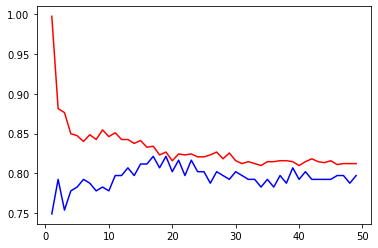

In [75]:
plt.plot(range(1,50),train_accuracy, color= "red")
plt.plot(range(1,50),test_accuracy, color="blue")
plt.show()

In [76]:
# after finding new n_neighbors then re write again Knn function

knn= KNeighborsClassifier(n_neighbors=19)

knn.fit(xtrain, ytrain)

ypred= knn.predict(xtest)


ac= accuracy_score(ytest,ypred)
cm= confusion_matrix(ytest,ypred)
cr= classification_report(ytest,ypred)

print(f"Accuracy: {ac}\n {cm}\n{cr}")

Accuracy: 0.821256038647343
 [[148   8]
 [ 29  22]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       156
           1       0.73      0.43      0.54        51

    accuracy                           0.82       207
   macro avg       0.78      0.69      0.72       207
weighted avg       0.81      0.82      0.80       207



In [77]:
train=knn.score(xtrain,ytrain)
test= knn.score(xtest,ytest)

print(f"Training Accuracy: {train}\nTesting Accuracy: {test}")

Training Accuracy: 0.8266666666666667
Testing Accuracy: 0.821256038647343


Training score and testing score are almost same after using Hyper parameter tunning in  KNN classifier

In [78]:
feature.columns

Index(['age', 'Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country'],
      dtype='object')

# Model Observation

In [79]:

def income():
    age1= float(input("Enter your Age: "))
    Workclass= float(input("Enter your Workclass: "))
    education = float(input("Enter your education: "))
    marital_status = float(input("Enter your marital-status: "))
    occupation = float(input("Enter your occupation: "))
    relationship = float(input("Enter your relationship: "))
    race = float(input("Enter your race: "))
    sex = float(input("Enter your sex: "))
    capital_gain = int(input("Enter your capital-gain: "))
    capital_loss = int(input("Enter your capital-loss: "))
    hours_per_week = int(input("Enter your hours-per-week: "))
    native_country = float(input("Enter your native-country: "))
    
    age= np.log(age1)
        
    
    newob = [[age, Workclass, education, marital_status, occupation, relationship, race, sex,capital_gain, capital_loss, hours_per_week, native_country]]
    newscaler= ss.transform(newob)
    yp= knn.predict(newscaler)
    if(yp==1):
        print("income would be >=50K")

    else:
        print("Income would be <50K")
        
       

<h3> age=40, workclass=  Self-emp-inc(3.0), education=  Bachelors (0.0) , marital-status = Married (0.0) , occupation=  Prof-specialty (9.0), relationship=Husband (0.0) , race= white (4.0) , sex= Male (1.0) , capital-gain=0 , capital-loss= 0,hours-per-week= 50, native-country= United-States (3.0) </h3>

In [80]:
income()

Enter your Age: 40
Enter your Workclass: 3
Enter your education: 0
Enter your marital-status: 0
Enter your occupation: 9
Enter your relationship: 0
Enter your race: 4
Enter your sex: 1
Enter your capital-gain: 0
Enter your capital-loss: 0
Enter your hours-per-week: 50
Enter your native-country: 3
income would be >=50K


<h3> age=49, workclass=private(2), education=  HS-grad (2.0) , marital-status = married (0.0) , occupation=  Craft-repair(2.0), relationship=Husband (0.0) , race= white (4.0) , sex= Male (1.0) , capital-gain=0 , capital-loss= 0,hours-per-week= 52, native-country= United-States (3.0) </h3>

In [81]:
income()

Enter your Age: 49
Enter your Workclass: 2
Enter your education: 2
Enter your marital-status: 0
Enter your occupation: 2
Enter your relationship: 0
Enter your race: 4
Enter your sex: 1
Enter your capital-gain: 0
Enter your capital-loss: 0
Enter your hours-per-week: 52
Enter your native-country: 3
Income would be <50K


<h3> age=42, workclass=  State-gov(5), education= Bachelors (0.0) , marital-status = Other (2.0) , occupation= Farming-fishing (4.0), relationship=Husband (0.0) , race= Other (3.0) , sex= Female (0.0) , capital-gain=0 , capital-loss= 0,hours-per-week= 40, native-country= United-States (3.0)  </h3>

In [82]:
income()

Enter your Age: 42
Enter your Workclass: 5
Enter your education: 0
Enter your marital-status: 2
Enter your occupation: 4
Enter your relationship: 0
Enter your race: 3
Enter your sex: 0
Enter your capital-gain: 0
Enter your capital-loss: 0
Enter your hours-per-week: 40
Enter your native-country: 3
Income would be <50K
